# Choosing color palettes

In [40]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))

## 通过color_palette()创建调色板

    最重要的直接设置调色板的函数就是color_palette()。这个函数提供了许多（并非所有）在seaborn内生成颜色的方式。并且它可以用于任何函数内部的palette参数设置（在某些情况下当需要多种颜色时也可以传入到color参数）

## 分类色板

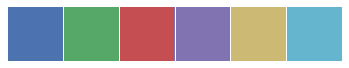

In [41]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

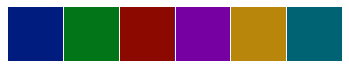

In [42]:
current_palette = sns.color_palette("dark")
sns.palplot(current_palette)

## 使用圆形颜色系统

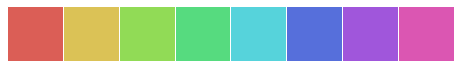

In [43]:
sns.palplot(sns.color_palette("hls", 8))

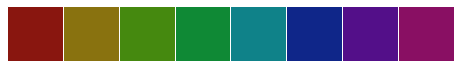

In [44]:
sns.palplot(sns.hls_palette(8, l=.3, s=.8))
# l-亮度 lightness / s-饱和 saturation

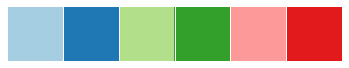

In [45]:
sns.palplot(sns.color_palette("Paired"))

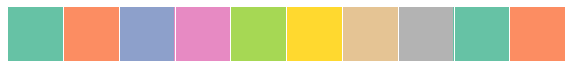

In [46]:
sns.palplot(sns.color_palette("Set2", 10))

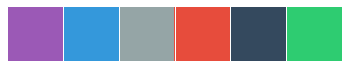

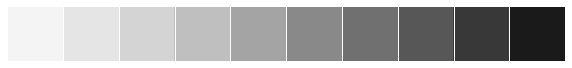

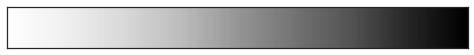

In [47]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))
sns.choose_colorbrewer_palette("sequential")
# data_type: {‘sequential’, ‘diverging’, ‘qualitative’}
sns.choose_colorbrewer_palette("sequential",as_cmap=True)
# as_cmap参数用来更改显示的颜色范围是离散的还是连续的

####    xkcd包含了一套众包努力的针对随机RGB色的命名。产生了954个可以随时通过xdcd_rgb字典中调用的命名颜色。

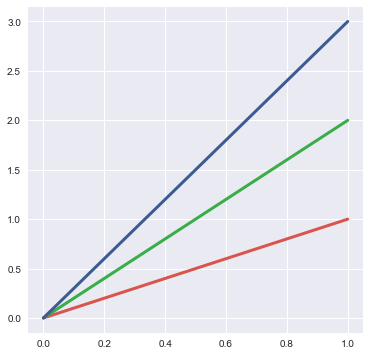

In [48]:
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3);

#### 也可以通过名称列表传入xkcd_palette()函数中取得颜色组

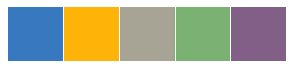

In [49]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

#### 连续色板

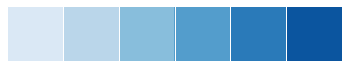

In [50]:
sns.palplot(sns.color_palette("Blues"))

#### 就像在matplotlib中一样，如果您想要翻转渐变，您可以在面板名称中添加一个_r后缀。

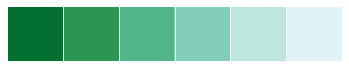

In [72]:
sns.palplot(sns.color_palette("BuGn_r"))

## cubehelix_palette()函数的连续调色板

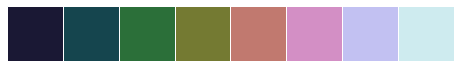

In [52]:
sns.palplot(sns.color_palette("cubehelix", 8))

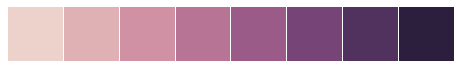

In [53]:
sns.palplot(sns.cubehelix_palette(8))

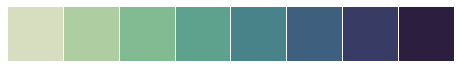

In [54]:
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))

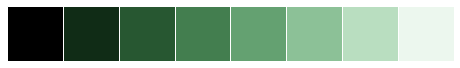

In [55]:
sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))

#### 默认情况下你只会得到一些与seaborn调色板相似的颜色的列表，但你也可以让调色板返回一个可以用as_cmap=True传入seaborn或matplotlib函数的颜色映射对象

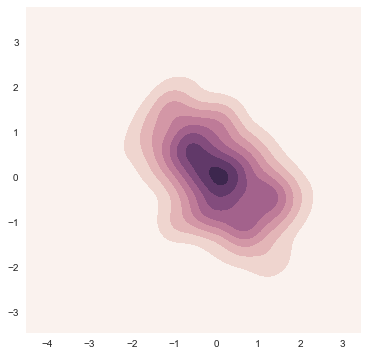

In [56]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);

## 使用light_palette() 和dark_palette()调用定制连续调色板

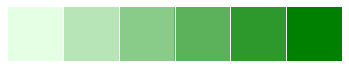

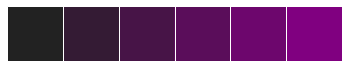

In [57]:
sns.palplot(sns.light_palette("green"))
sns.palplot(sns.dark_palette("purple"))

#### 这些调色板结果也可以颠倒

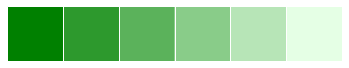

In [58]:
sns.palplot(sns.light_palette("green", reverse=True))

#### 当然也可以创建一个颜色映射对象取代颜色列表

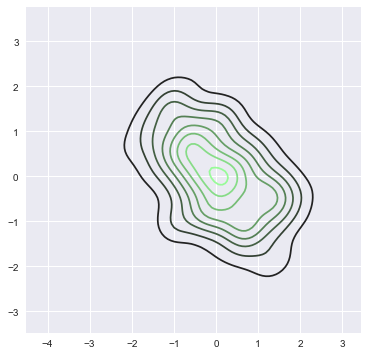

In [59]:
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.kdeplot(x, y, cmap=pal);

#### 默认情况下，任何有效的matplotlib颜色可以传递给input参数。也可以在hls或husl空间中提供默认的rgb元组，您还可以使用任何有效的xkcd颜色的种子。

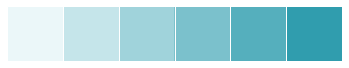

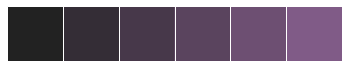

In [60]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

## 离散色板

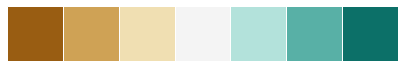

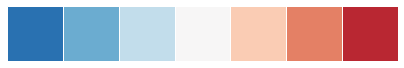

In [61]:
sns.palplot(sns.color_palette("BrBG", 7))
sns.palplot(sns.color_palette("RdBu_r", 7))

#### 另一个在matplotlib中建立的明智的选择是coolwarm面板。请注意，这个颜色映射在中间值和极端之间并没有太大的对比。

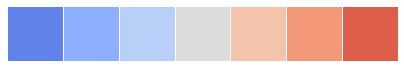

In [62]:
sns.palplot(sns.color_palette("coolwarm", 7))

#### 用diverging_palette()使用定制离散色板

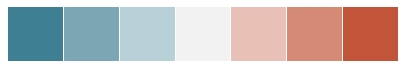

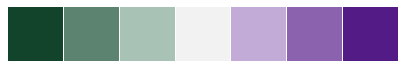

In [63]:
sns.palplot(sns.diverging_palette(220, 20, n=7))
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7))

#### sep参数控制面板中间区域的两个渐变的宽度。

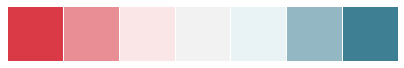

In [64]:
sns.palplot(sns.diverging_palette(10, 220, sep=80, n=7))

#### 也可以用中间的色调来选择调色，而不是用亮度

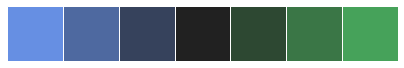

In [65]:
sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

#### 用set_palette()更改色变的默认值

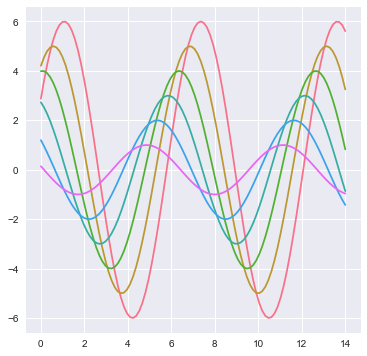

In [66]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sns.set_palette("husl")
sinplot()

#### color_palette()函数也可以在一个with块中使用，以达到临时更改调色板的目的

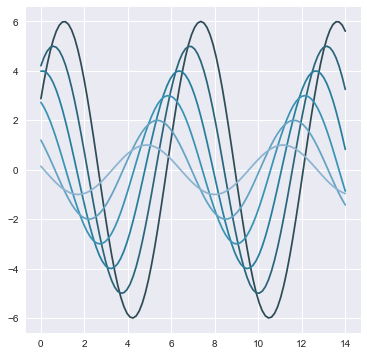

In [67]:
with sns.color_palette("PuBuGn_d"):
    sinplot()

#### 简单常用色彩总结：

    分类：hls husl Paired Set1~Set3（色调不同）
    连续：Blues[蓝s，颜色+s] BuGn[蓝绿] cubehelix（同色系渐变）
    离散：BrBG[棕绿] RdBu[红蓝] coolwarm[冷暖]（双色对称）